In [1]:
from engine import *
from diffusion import *
from matplotlib import pyplot as plt

SyntaxError: invalid syntax (engine.py, line 722)

In [9]:
skretch = gen_metropolis(30)

skretch = add_skies(skretch, 1, Z = 200)

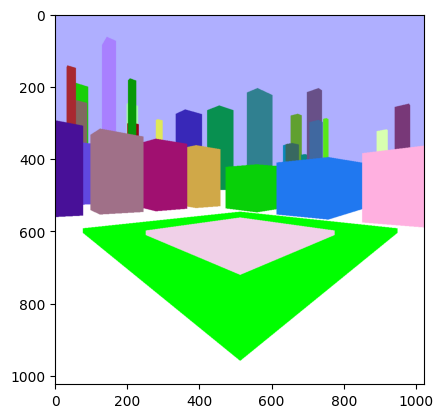

In [10]:
verbose = 0
linewidth = 0
pov = Point(0,0,12)
direction = Point(1,1,-0.1)
vision_angle = 35

sc1 = Scene(skretch, pov, direction, resolution = (1024,1024), vision_angle = 40, verbose = verbose, linewidth = linewidth)

seg_map = sc1.get_seg_map()
plt.imshow(seg_map)

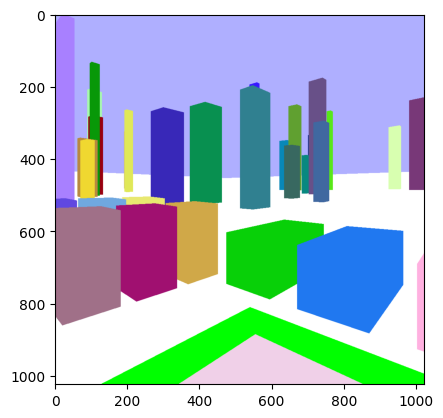

In [11]:
pov = Point(0,10,40)
direction = Point(1,0.9,-0.1)
sc2 = Scene(skretch, pov, direction, resolution = (1024,1024), vision_angle = 35, verbose = verbose, linewidth = linewidth)
seg_map = sc2.get_seg_map()
plt.imshow(seg_map)

In [15]:
prompt = "a cyberpunk city. Neon lighting, Dark skies. Epic realistic, (hdr:1.4), (muted colors:1.4), apocalypse, abandoned, screen space refractions, (intricate details), (intricate details, hyperdetailed:1.4), artstation, vignette"
device = "cuda"
model = "realistic"
control = ["seg"]
steps = 400

stamped_img = run_diffusion(sc1 , device = device, prompt = prompt, model = model, control = control, steps = steps)

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/400 [00:00<?, ?it/s]

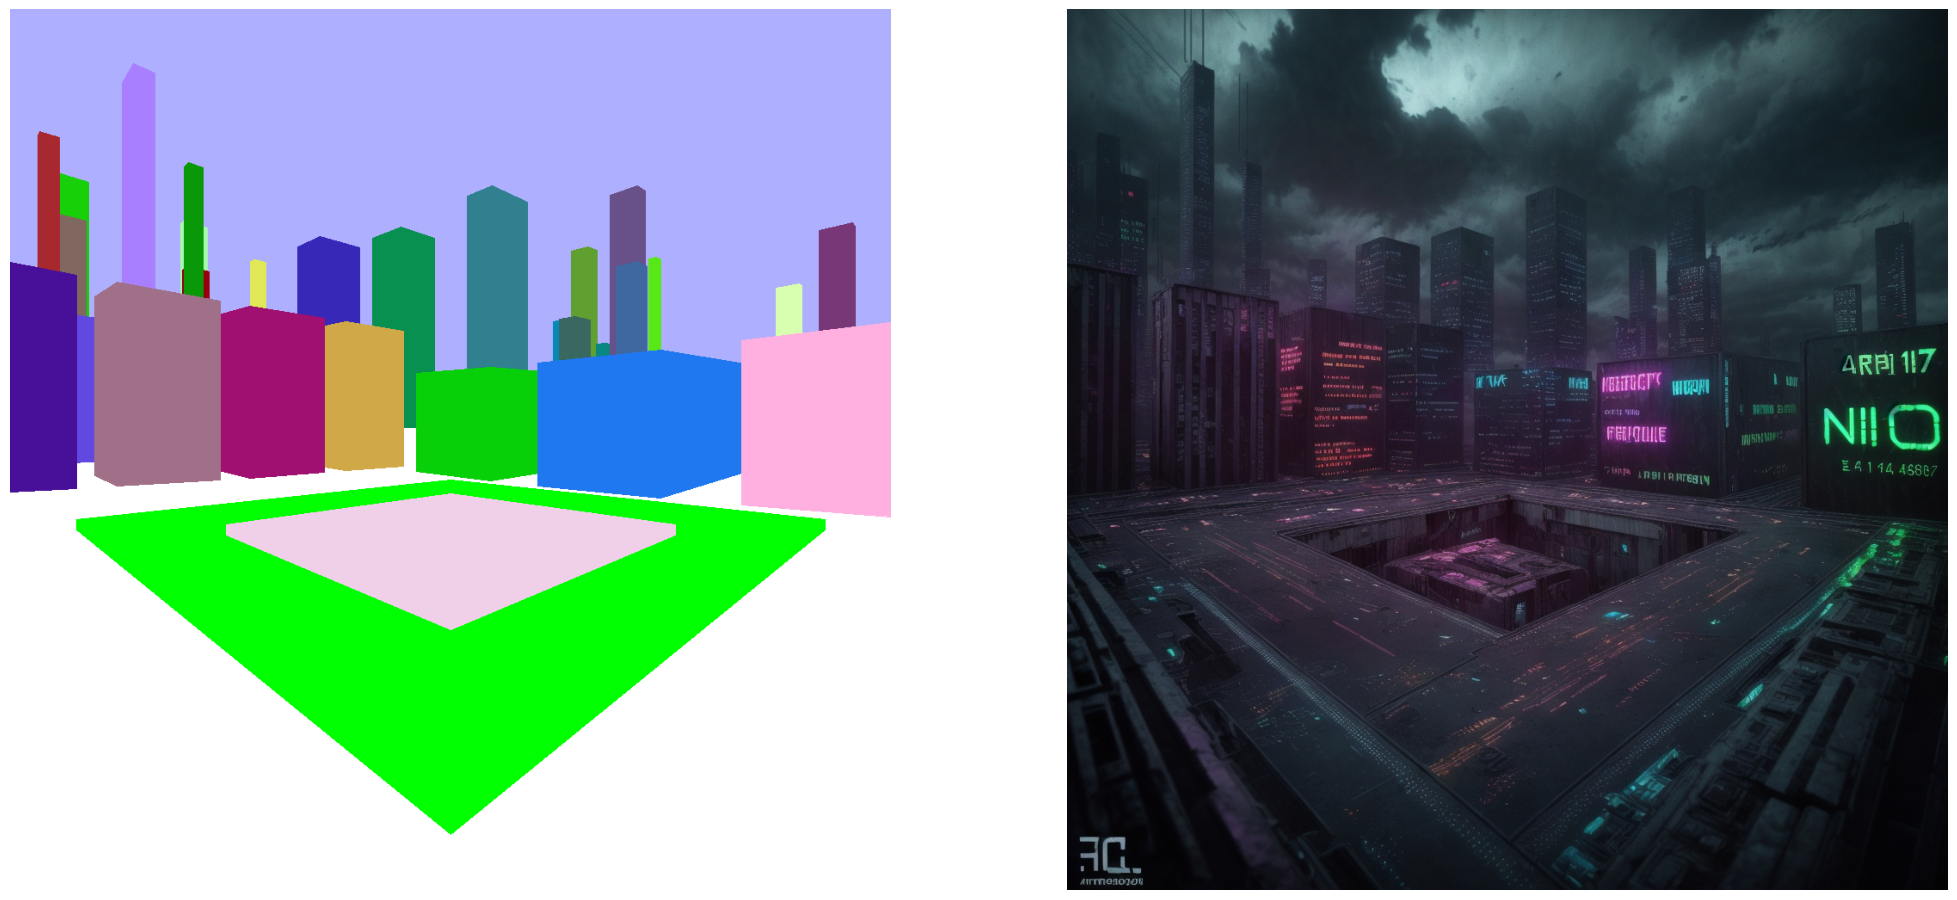

In [16]:


src = [[sc1.get_seg_map()]] 
results = [stamped_img[0]]

present([stamped_img[1]], [stamped_img[0]])

In [18]:
sc1.stamp(stamped_img[0], verbose = False)

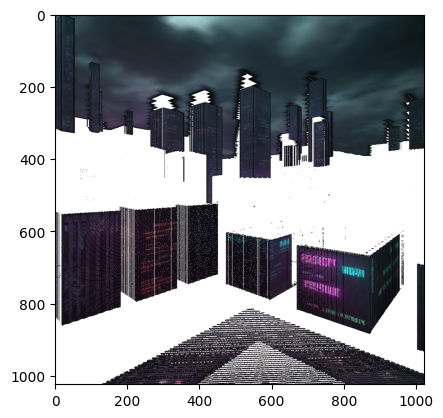

In [19]:
unstamped_img = sc2.unstamp(verbose = False)

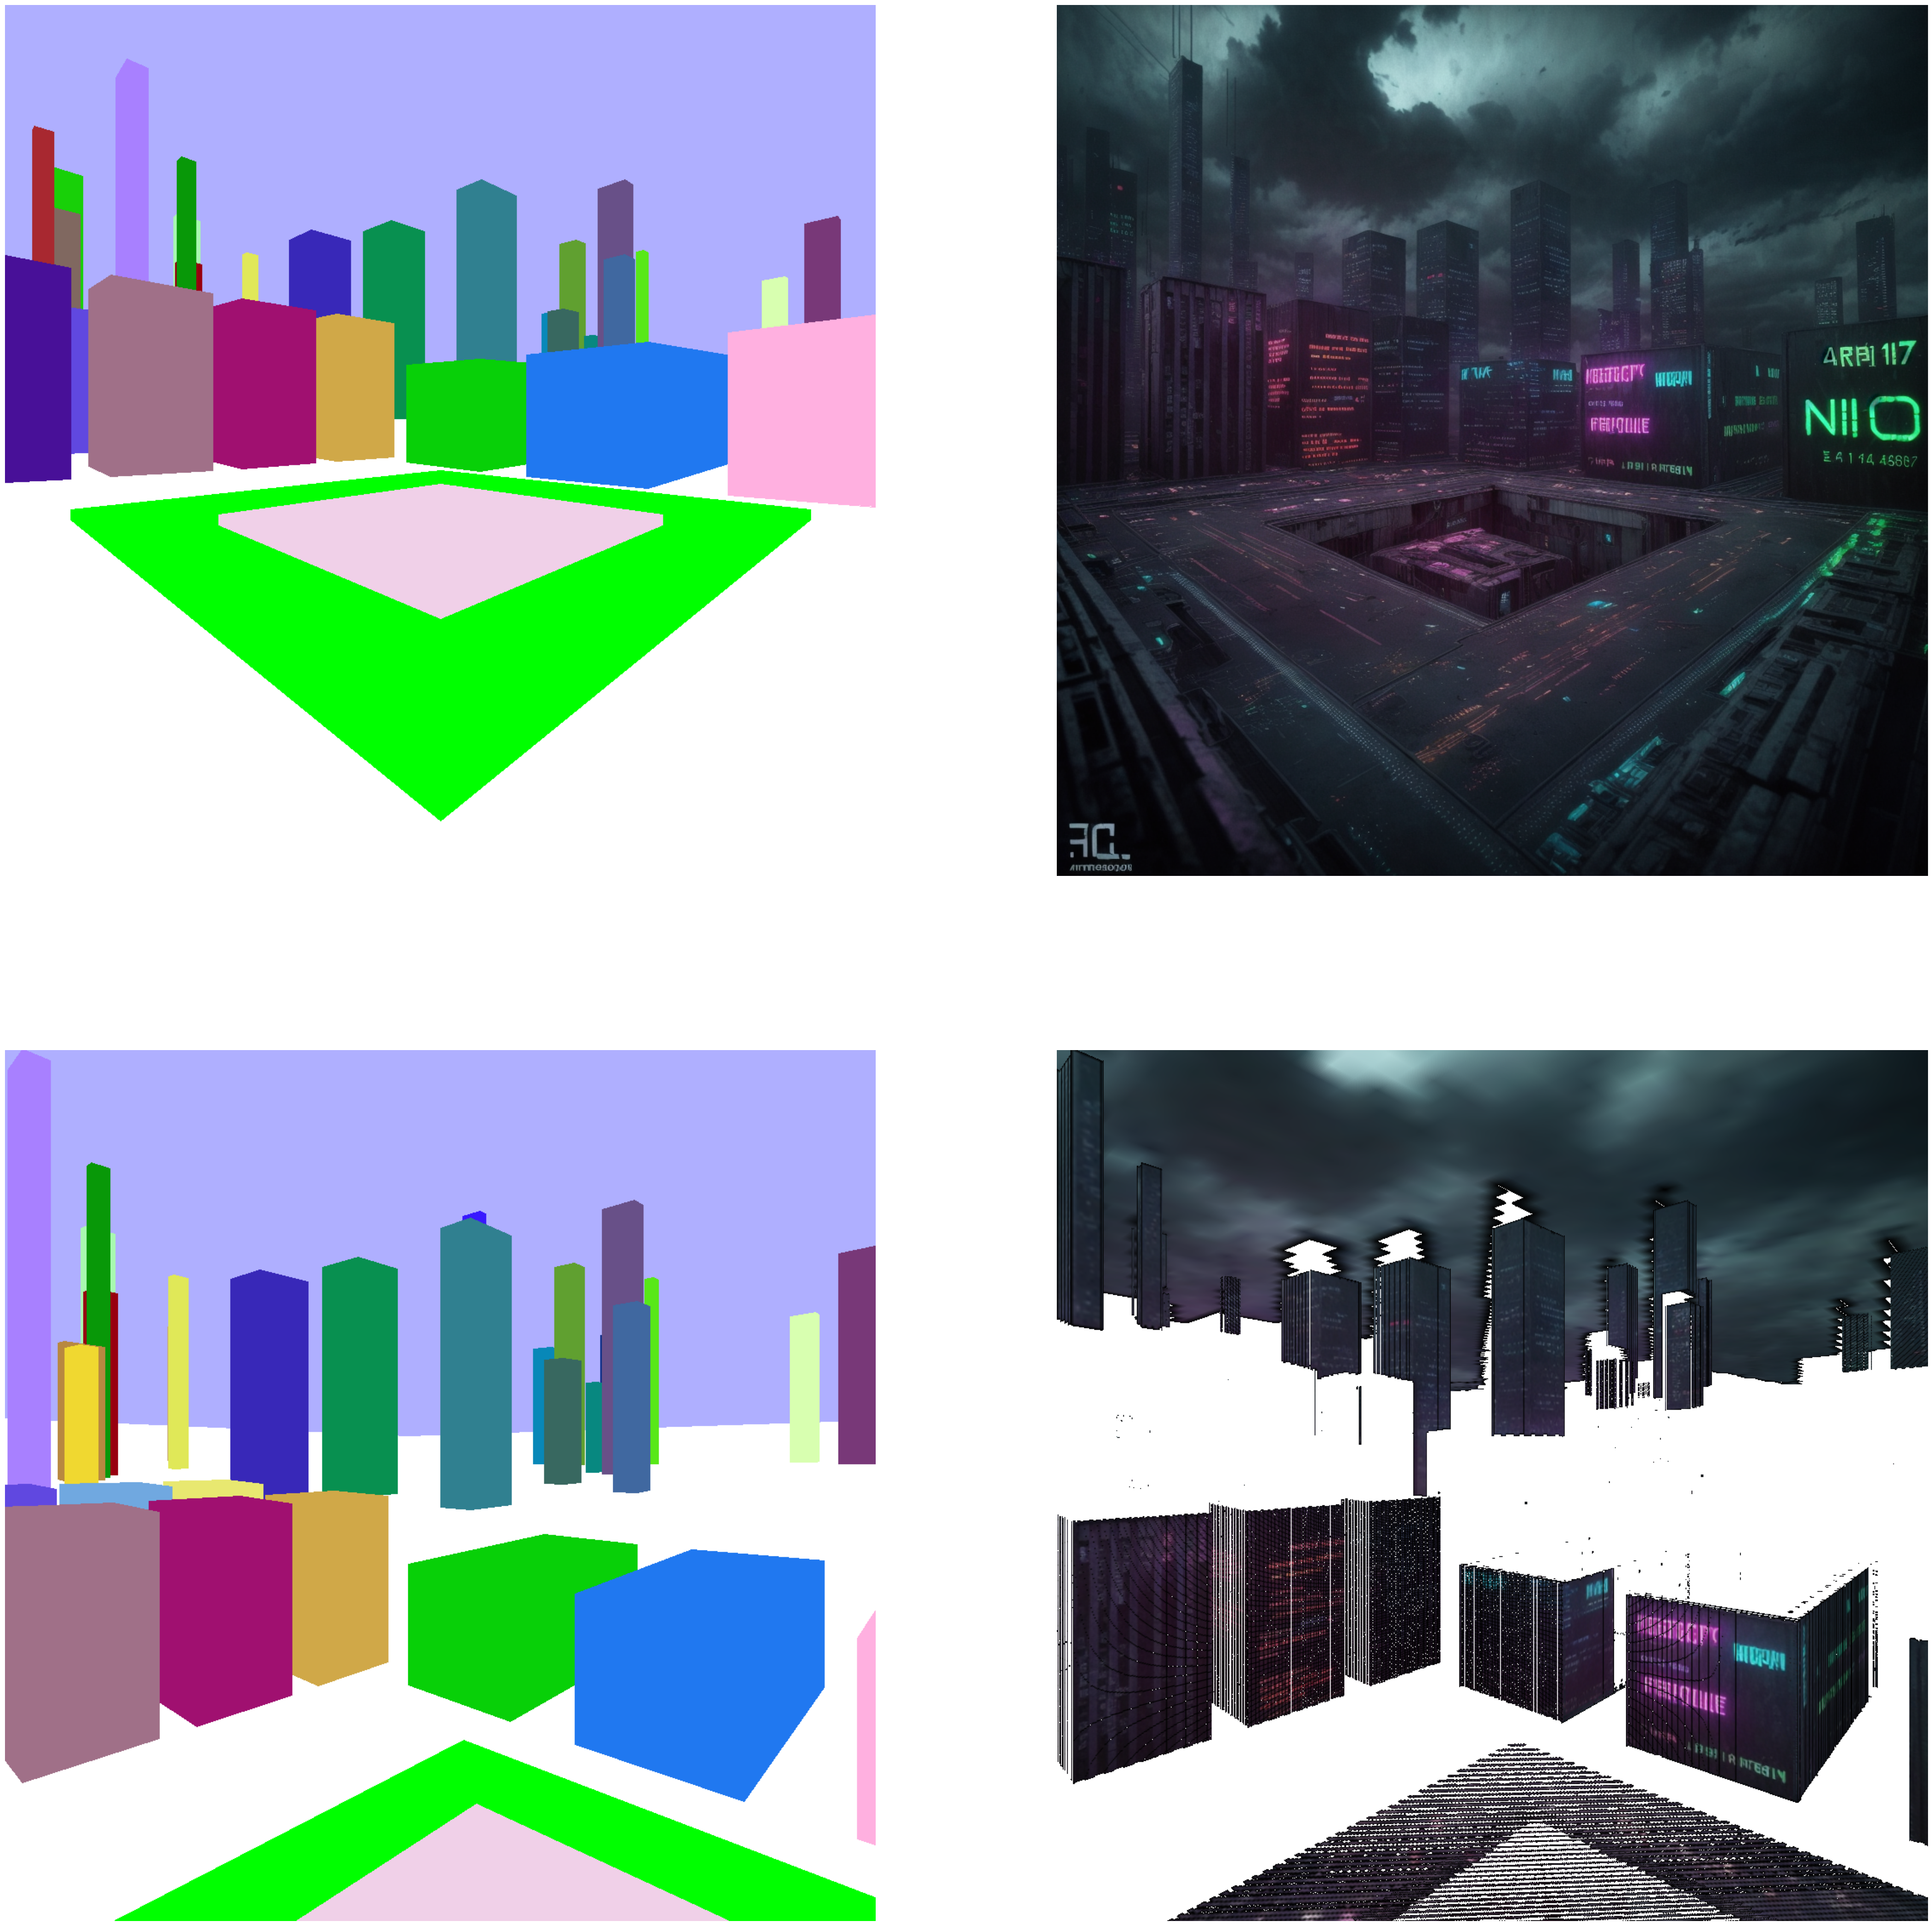

In [21]:
src = [[sc.get_seg_map()] for sc in [sc1,sc2]] 
results = [ stamped_img[0]  , unstamped_img ] 

present(src, results)